In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Temperaturas KKK
- Se incluye análisis de temperaturas en mediciones tags actuales.
- Vista proceso de operación intermitente KKK.

In [2]:
df1 = pd.read_excel('primero-111.xlsx')
df2 = pd.read_excel('segundo-111.xlsx')
df3 = pd.read_excel('tercero-111.xlsx')
df4 = pd.read_excel('cuarto-111.xlsx')
df = pd.concat([df1,df2,df3]).reset_index(drop=True)

print(df.columns)

Index(['Time', 'CVG.TT_111', 'CVG.TT_112'], dtype='object')


In [3]:
df

,Time,CVG.TT_111,CVG.TT_112
0,2021-01-01 00:00:00,30.550146,51.994179
1,2021-01-01 00:00:09,30.525618,52.007641
2,2021-01-01 00:00:18,30.501087,52.021103
3,2021-01-01 00:00:27,30.476559,52.034565
4,2021-01-01 00:00:36,30.452030,52.048031
...,...,...,...
2620798,2021-09-30 23:59:24,23.204954,45.278385
2620799,2021-09-30 23:59:33,23.192017,45.346329
2620800,2021-09-30 23:59:42,23.179079,45.375591
2620801,2021-09-30 23:59:51,23.166142,45.356609


In [4]:
temp1 = df.iloc[:,1]
temp2 = df.iloc[:,2]


In [5]:
s1 = pd.to_numeric(temp1,errors = 'coerce')
s1=s1.dropna()

s2 = pd.to_numeric(temp2,errors = 'coerce')
s2=s2.dropna()

In [7]:
# Removiendo valores altos correspondientes a outliers
quitar = 1750

data = temp1
indexed_data = list(enumerate(data))

# Sort datos y remover por index
sorted_data = sorted(indexed_data, key=lambda x: x[1], reverse=True)
trimmed_data = sorted_data[quitar:]

# nuevo frame
medi_temp1= [x[1] for x in sorted(trimmed_data, key=lambda x: x[0])]

In [8]:
data = temp2

indexed_data = list(enumerate(data))

# Sort datos y remover por index
sorted_data = sorted(indexed_data, key=lambda x: x[1], reverse=True)
trimmed_data = sorted_data[quitar:]

# nuevo frame
medi_temp2= [x[1] for x in sorted(trimmed_data, key=lambda x: x[0])]

In [10]:
# Removiendo valores BAJOS correspondientes a fallas

temp1_prueb = medi_temp1
temp2_prueb = medi_temp2

remove = 1500

for i in range(1,remove):
    temp1_prueb.remove(min(temp1_prueb))
    temp2_prueb.remove(min(temp2_prueb))

In [12]:
temp1_p = pd.DataFrame(temp1_prueb)
temp2_p = pd.DataFrame(temp2_prueb)
# Define the threshold value
threshold = 8

# Filter the dataframe using boolean indexing
df_filtered = temp1_p[temp1_p.iloc[:, 0] >= threshold]



rolling =600

rm1 = df_filtered.rolling(window = rolling).mean()
rm2 = temp2_p.rolling(window = rolling).mean()

Text(0, 0.5, 'Desviación')

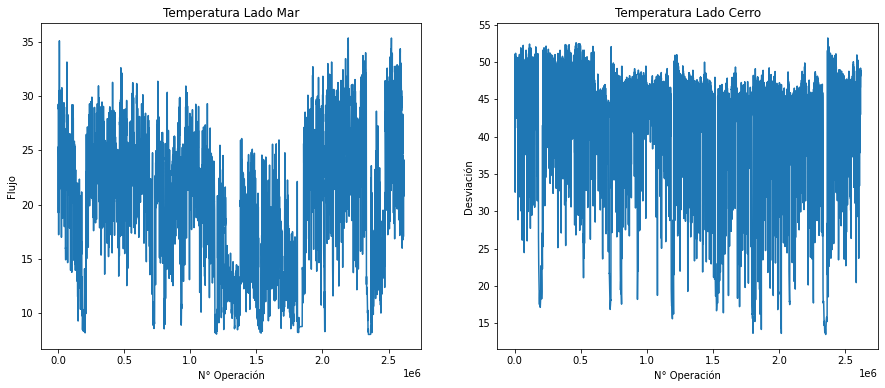

In [13]:
#Gráfico FINAL BSS con Rolling Mean

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

axes[0].plot(rm1, label = 'Flujo')
axes[0].set_title("Temperatura Lado Mar")
axes[0].set_xlabel("N° Operación")
axes[0].set_ylabel("Flujo")


axes[1].plot(rm2, label = 'STD Flujo')
axes[1].set_title("Temperatura Lado Cerro")
axes[1].set_xlabel("N° Operación")
axes[1].set_ylabel("Desviación")

In [14]:
temp1_p = pd.DataFrame(temp1_prueb[:150000])
temp2_p = pd.DataFrame(temp2_prueb[:150000])
# Define the threshold value
threshold = 8

# Filter the dataframe using boolean indexing
df_filtered = temp1_p[temp1_p.iloc[:, 0] >= threshold]



rolling =110

rm1 = df_filtered.rolling(window = rolling).mean()
rm2 = temp2_p.rolling(window = rolling).mean()

In [16]:
media_t1 = np.mean(rm1)
media_t2 = np.mean(rm2)

print(media_t1)
print(media_t2)

0    23.50353
dtype: float64
0    46.154271
dtype: float64


C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


print(type(temp1_prueb))

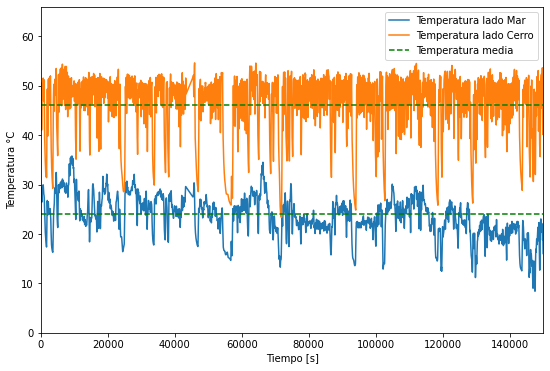

In [17]:
fig = plt.figure(figsize=(9,6))

plt.plot(rm1, label = 'Temperatura lado Mar')
plt.plot(rm2, label = 'Temperatura lado Cerro')

plt.xlim(0, 150000)  # Set x-axis limits
plt.ylim(0, 66)  # Set y-axis limits

plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura °C")


plt.axhline(24, color = 'g', linestyle='dashed', label = "Temperatura media")
plt.axhline(46, color = 'g', linestyle='dashed')
plt.legend(loc='upper right')

plt.savefig('Temperaturas_descansos.png', dpi=800)
plt.savefig('temperturas.svg', format='svg')
plt.show()


In [19]:
print("Promedio Lado Mar")
np.mean(temp1_prueb)

Promedio Lado Mar


20.426825189167467

In [20]:
print("Promedio Lado Cerro")
np.mean(temp2_prueb)

Promedio Lado Cerro


42.13800815096971

medi_temp1

In [21]:
pin = pd.read_excel('pin.xlsx')

In [22]:
pin_p = pin.iloc[:,1]
pin_p

0        15
1        15
2        15
3        14
4        14
         ..
86396    16
86397    16
86398    16
86399    16
86400    16
Name: CVG.VDF_KKK_P_IN, Length: 86401, dtype: int64

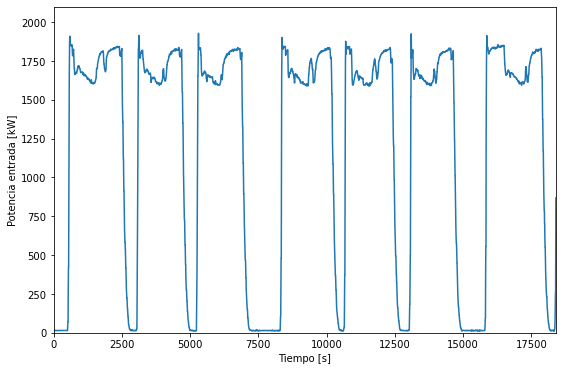

In [25]:
fig, ax = plt.subplots(figsize=(9, 6))

# plot the data
ax.plot(pin_p[:18400])
ax.set_xlim(0, 18400)
ax.set_ylim(0, 2100)

ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Potencia entrada [kW]')

plt.savefig('Proceso_ope.png', dpi=1000)
plt.savefig('proceso.svg', format='svg')